In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [4]:
hr_data=pd.read_csv('HR_comma_sep.csv')

In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
cols=hr_data.columns.tolist()
cols.insert(10,cols.pop(cols.index('left')))
hr_data=hr_data[cols]

In [7]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [8]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
left                     0
dtype: int64

In [10]:
#Drop duplicate
hr_data = hr_data.drop_duplicates()

<AxesSubplot:xlabel='left', ylabel='count'>

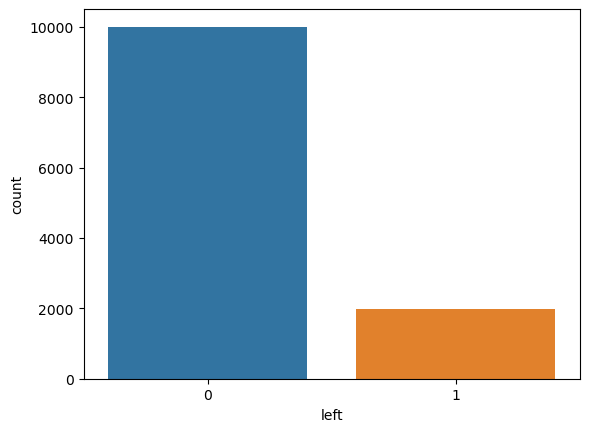

In [11]:
sns.countplot(hr_data.left)

<AxesSubplot:xlabel='salary', ylabel='count'>

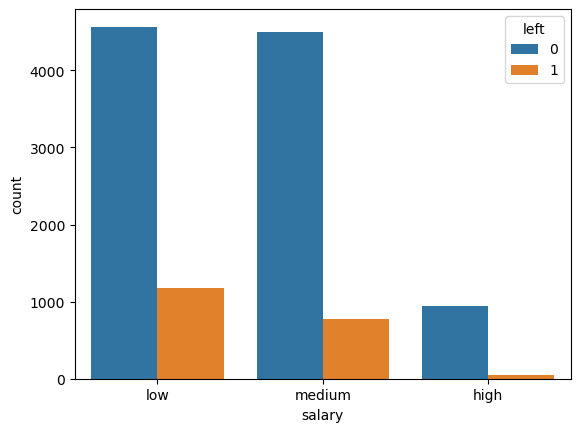

In [12]:
sns.countplot(data=hr_data, x='salary', hue='left')

<AxesSubplot:xlabel='Department', ylabel='count'>

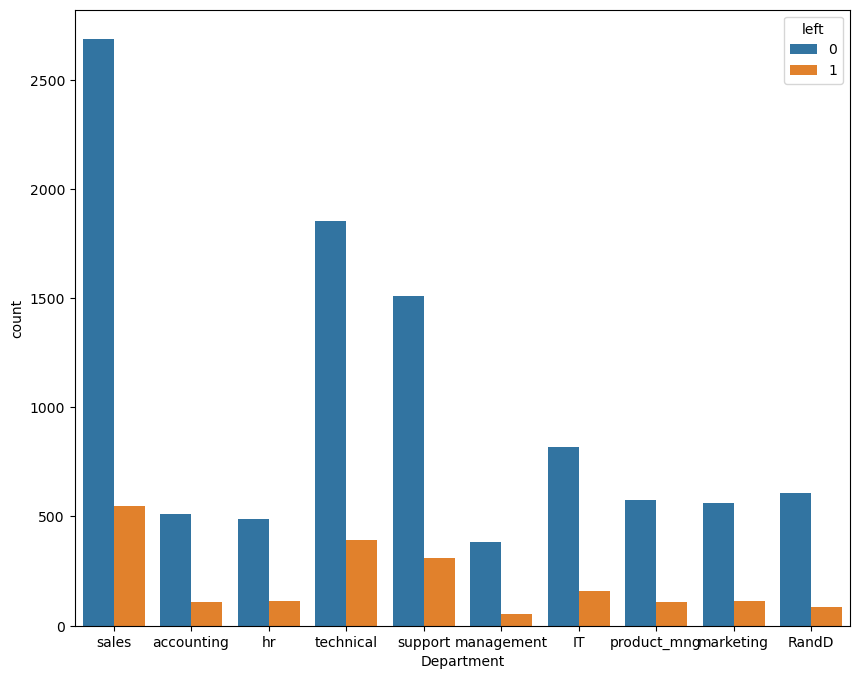

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data=hr_data, x='Department', hue='left')

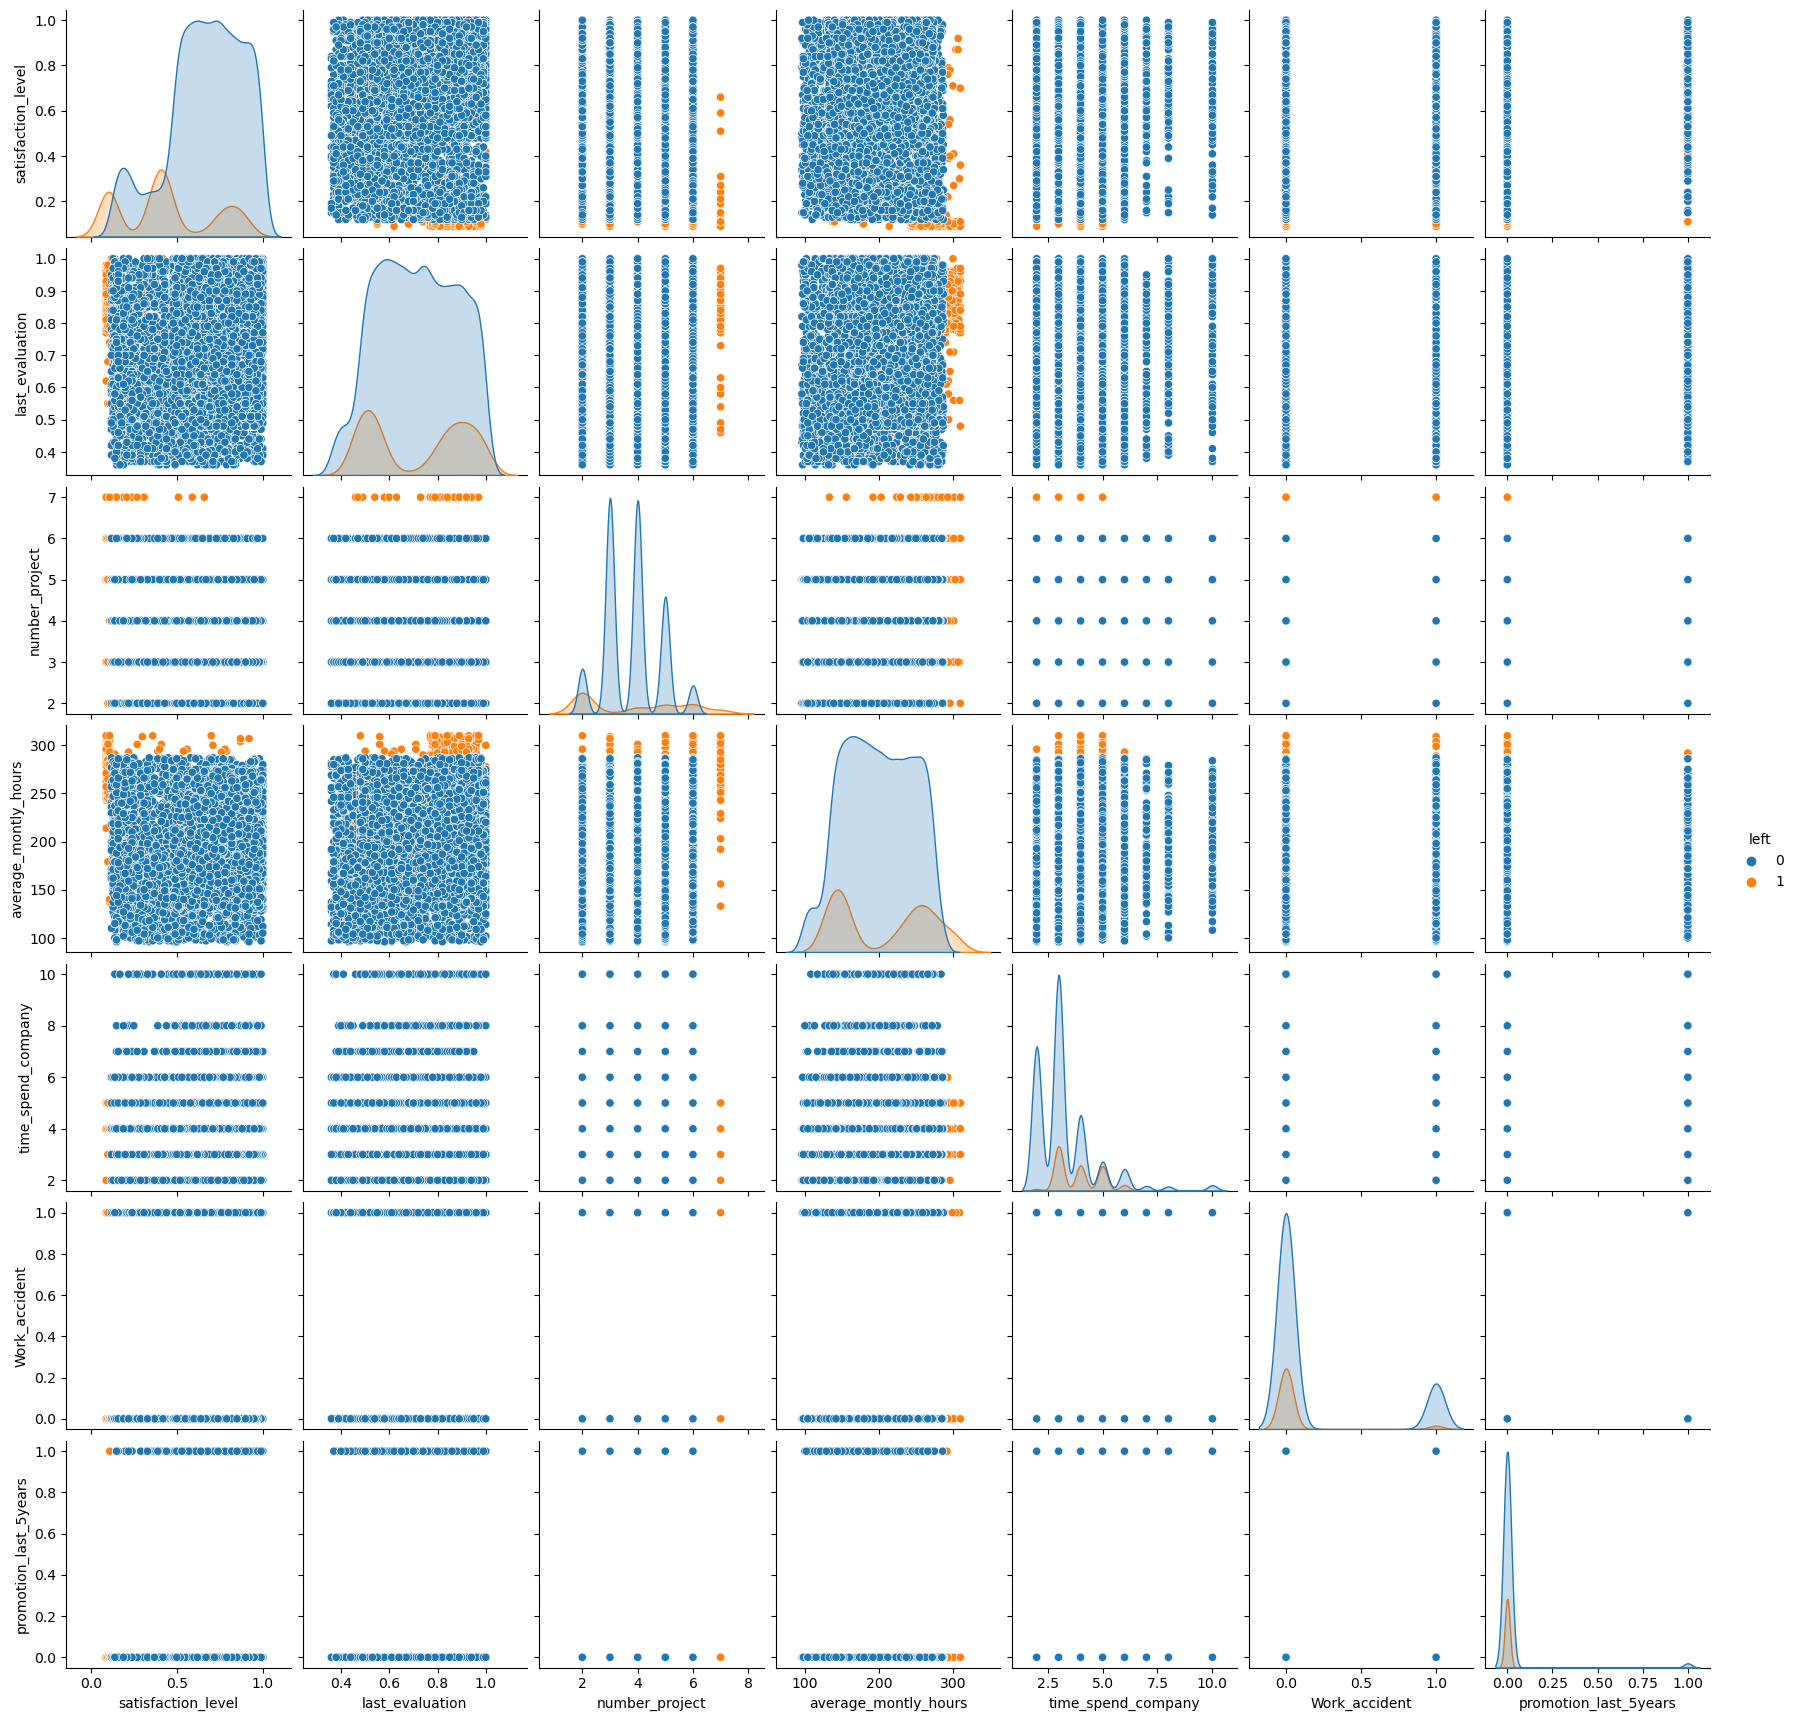

In [14]:
sns.pairplot(hr_data, hue = 'left')

<AxesSubplot:>

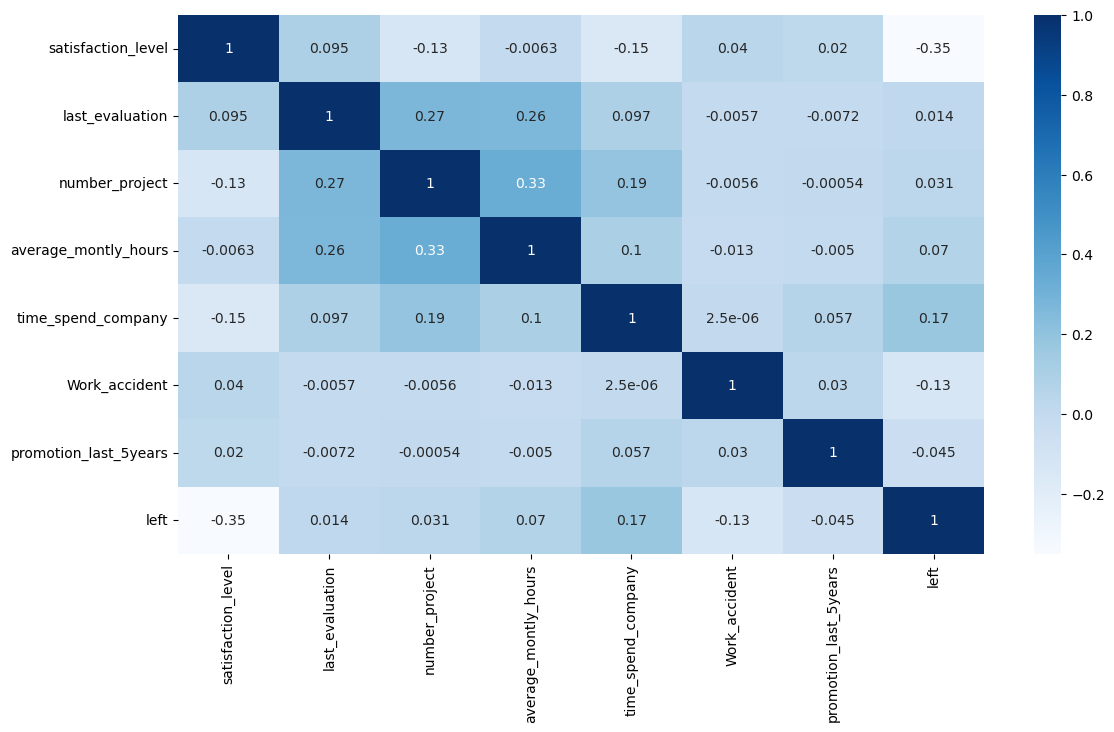

In [15]:
plt.figure(figsize=(13,7))
sns.heatmap(hr_data.corr(), annot=True,cmap='Blues')

In [16]:
# Select features and target
X = hr_data.drop(columns=['left', 'Department', 'Work_accident'], axis=1)
y = hr_data['left']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
## Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
lgr=LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred, y_test)

0.8278449353897457

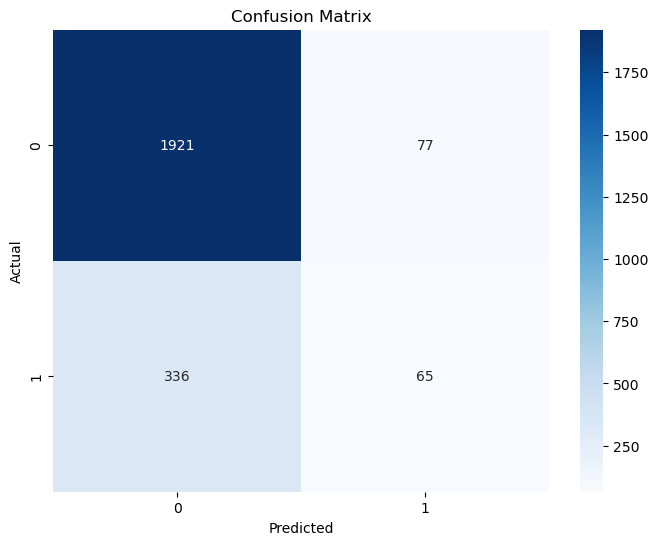

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2257
           1       0.16      0.46      0.24       142

    accuracy                           0.83      2399
   macro avg       0.56      0.65      0.57      2399
weighted avg       0.91      0.83      0.86      2399



In [26]:
!pip install imbalanced-learn

In [27]:
import itertools
from imblearn.over_sampling import SMOTE
from collections import Counter

In [28]:
X_resampled, Y_resampled = SMOTE().fit_resample(X, y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (20000, 8)
Resampled shape of Y:  (20000,)
Counter({1: 10000, 0: 10000})


In [29]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)
predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [30]:
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

Confusion Matrix - Random Forest
[[3007   30]
 [ 154 2809]]


In [31]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score,classification_report
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [32]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.96933
Precision: 0.98943
Recall: 0.94803
F1-score: 0.96829


In [33]:
print(classification_report(test_Y,predictions_resampled))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3037
           1       0.99      0.95      0.97      2963

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



array([1, 0], dtype=int64)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
## Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [73]:
X_train_scaled.shape

(9592, 8)

In [74]:
y_train.shape

(9592,)

In [81]:
# sequential model
ann_model = keras.Sequential()

# adding dense layer
ann_model.add(Dense(8, input_dim=X_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(8, activation='linear'))
ann_model.add(Dropout(0.4))

# adding dense layer with softmax activation/output layer
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 8)                 72        
                                                                 
 dropout_46 (Dropout)        (None, 8)                 0         
                                                                 
 dense_57 (Dense)            (None, 8)                 72        
                                                                 
 dropout_47 (Dropout)        (None, 8)                 0         
                                                                 
 dense_58 (Dense)            (None, 8)                 72        
                                                                 
 dropout_48 (Dropout)        (None, 8)                 0         
                                                                 
 dense_59 (Dense)            (None, 1)               

In [82]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [83]:
history = ann_model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
240/240 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.8201 - val_loss: 0.3533 - val_accuracy: 0.8348
Epoch 2/20
240/240 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8517 - val_loss: 0.2359 - val_accuracy: 0.8854
Epoch 3/20
240/240 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8665 - val_loss: 0.2072 - val_accuracy: 0.8927
Epoch 4/20
240/240 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.8822 - val_loss: 0.1899 - val_accuracy: 0.8958
Epoch 5/20
240/240 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8969 - val_loss: 0.1865 - val_accuracy: 0.8973
Epoch 6/20
240/240 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.8993 - val_loss: 0.1891 - val_accuracy: 0.8942
Epoch 7/20
240/240 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.9105 - val_loss: 0.1739 - val_accuracy: 0.9458
Epoch 

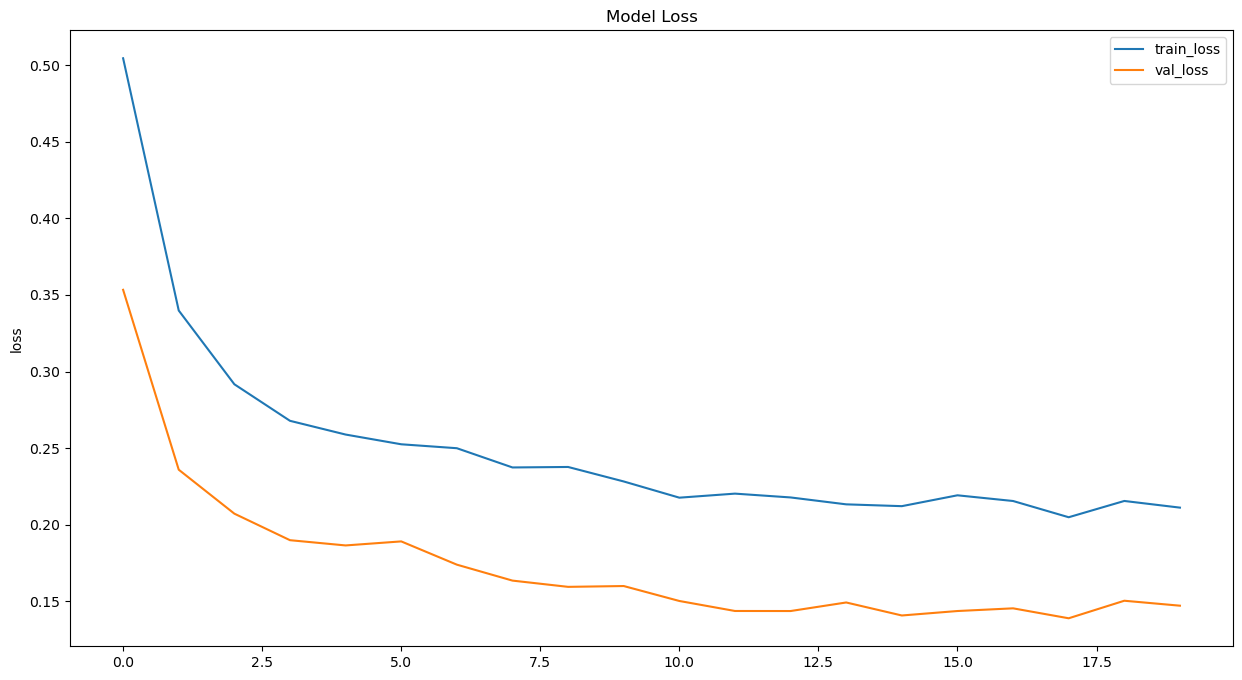

In [84]:
# Plot the model performance across epochs
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.savefig('modelloss.png', facecolor='w', bbox_inches='tight')
plt.show()

In [85]:
y_predict = ann_model.predict(X_test_scaled)

75/75 [==============================] - 0s 1ms/step


In [89]:
y_pred = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")

75/75 [==============================] - 0s 1ms/step


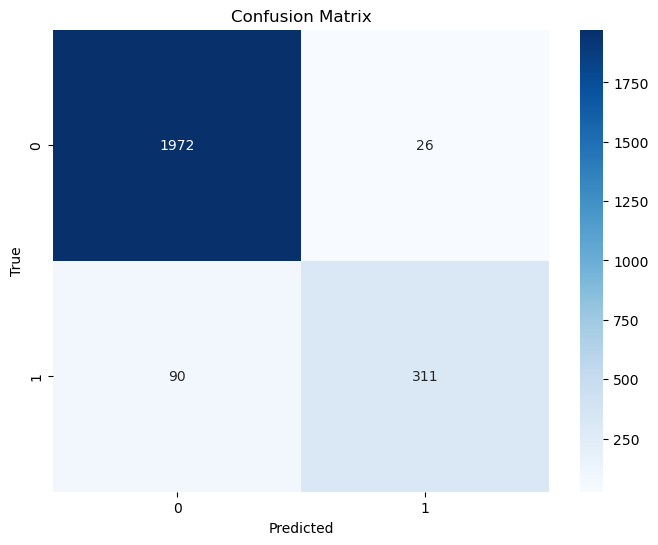

In [93]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1998
           1       0.92      0.78      0.84       401

    accuracy                           0.95      2399
   macro avg       0.94      0.88      0.91      2399
weighted avg       0.95      0.95      0.95      2399

